## Load and Inspect Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
#load dataset and check information
df = pd.read_csv('Bank_complaints.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
Product                         60000 non-null object
Consumer complaint narrative    60000 non-null object
dtypes: object(2)
memory usage: 937.6+ KB
None


,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


In [3]:
#Preview what these categories are and what percent of the complaints each accounts for.
df["Product"].value_counts(normalize=True)

Student loan                   0.190067
Credit card                    0.159000
Consumer Loan                  0.157900
Mortgage                       0.138867
Bank account or service        0.138483
Credit reporting               0.114400
Checking or savings account    0.101283
Name: Product, dtype: float64

In [7]:
#setting aside 40000 samples
random.seed(123)
df = df.sample(40000)
df.index = range(40000)
product = df["Product"]
complaints = df["Consumer complaint narrative"]

## Preprocessing

In [8]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)

one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)

(40000, 2000)

### Decode Word Vectors

In [9]:
#transform the product labels to numerical values
le = preprocessing.LabelEncoder()
le.fit(product)
product_cat = le.transform(product) 

#Then transform these integer values into a matrix of binary flags
product_onehot = to_categorical(product_cat)

### Train-Test-Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_results, product_onehot, test_size=5000, random_state=42)

#### Validation Set

In [11]:
random.seed(123)
val = X_train[:10000]
train_final = X_train[10000:]
label_val = y_train[:10000]
label_train_final = y_train[10000:]

## Build the Network

In [13]:
from keras import regularizers
model = models.Sequential()#instantiate model design
model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,))) #1st hidden layer
model.add(layers.Dense(25,kernel_regularizer=regularizers.l2(0.005), activation='relu'))#2nd hidden layer
model.add(layers.Dense(7, activation='softmax'))#output layer - softmax will reyurn probability between 0-1

W0730 14:12:41.632927 11488 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 14:12:41.641904 11488 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Compiling the Model

In [14]:
model.compile(optimizer='SGD', #stochastic gradient descent
              loss='categorical_crossentropy', #loss function
              metrics=['accuracy']) #metric determined

W0730 14:12:48.297526 11488 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 14:12:48.328444 11488 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Training the Model

In [19]:
L2_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 28500 samples, validate on 10000 samples
Epoch 1/120
28500/28500 [==============================] - 1s 38us/step - loss: 0.5757 - acc: 0.8726 - val_loss: 0.7241 - val_acc: 0.8047
Epoch 2/120
28500/28500 [==============================] - 1s 37us/step - loss: 0.5735 - acc: 0.8732 - val_loss: 0.7209 - val_acc: 0.8062
Epoch 3/120
28500/28500 [==============================] - 1s 38us/step - loss: 0.5722 - acc: 0.8740 - val_loss: 0.7216 - val_acc: 0.8051
Epoch 4/120
28500/28500 [==============================] - 1s 37us/step - loss: 0.5707 - acc: 0.8745 - val_loss: 0.7218 - val_acc: 0.8077
Epoch 5/120
28500/28500 [==============================] - 1s 37us/step - loss: 0.5692 - acc: 0.8741 - val_loss: 0.7195 - val_acc: 0.8044
Epoch 6/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.5678 - acc: 0.8746 - val_loss: 0.7185 - val_acc: 0.8047
Epoch 7/120
28500/28500 [==============================] - 1s 38us/step - loss: 0.5659 - acc: 0.8751 - val_loss: 0.7201 - 

28500/28500 [==============================] - 1s 37us/step - loss: 0.5173 - acc: 0.8848 - val_loss: 0.6983 - val_acc: 0.8050
Epoch 60/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.5166 - acc: 0.8844 - val_loss: 0.6987 - val_acc: 0.8058
Epoch 61/120
28500/28500 [==============================] - 1s 37us/step - loss: 0.5160 - acc: 0.8840 - val_loss: 0.6995 - val_acc: 0.8053
Epoch 62/120
28500/28500 [==============================] - 1s 37us/step - loss: 0.5156 - acc: 0.8843 - val_loss: 0.6965 - val_acc: 0.8043
Epoch 63/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.5145 - acc: 0.8844 - val_loss: 0.6984 - val_acc: 0.8052
Epoch 64/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.5142 - acc: 0.8847 - val_loss: 0.6963 - val_acc: 0.8059
Epoch 65/120
28500/28500 [==============================] - 1s 35us/step - loss: 0.5134 - acc: 0.8859 - val_loss: 0.6986 - val_acc: 0.8023
Epoch 66/120
28500/28500 [==============

Epoch 118/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.4886 - acc: 0.8913 - val_loss: 0.6987 - val_acc: 0.8012
Epoch 119/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.4881 - acc: 0.8909 - val_loss: 0.6962 - val_acc: 0.8025
Epoch 120/120
28500/28500 [==============================] - 1s 36us/step - loss: 0.4878 - acc: 0.8915 - val_loss: 0.6950 - val_acc: 0.8031


### Look at History

In [20]:
L2_model_dict = L2_model.history
L2_model_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plot results

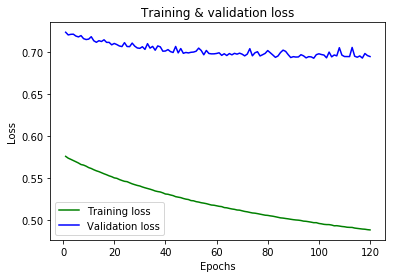

In [21]:
#training/validation loss
plt.clf()

import matplotlib.pyplot as plt
loss_values = L2_model_dict['loss']
val_loss_values = L2_model_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

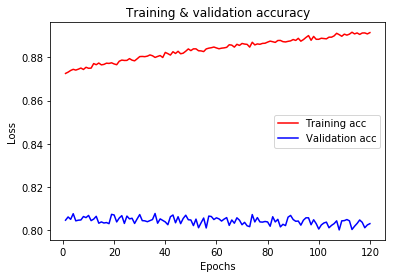

In [22]:
plt.clf()

acc_values = L2_model_dict['acc'] 
val_acc_values = L2_model_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make predictions

In [23]:
y_hat_test = model.predict(X_test) #Output (probability) predictions for the test set.

## Evaluate Performance

In [24]:
results_test = model.evaluate(X_test, y_test)
results_test

1500/1500 [==============================] - 0s 33us/step


[0.7111668507258098, 0.7973333331743876]

## Results

The model provided was able to predict the test set with ~80% accuracy. 